In [2]:
import sys
sys.path.append('../')
import numpy as np
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt, amin, amax, mean, dot, power
import h5py, os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from matplotlib import pyplot as plt
import scipy, time, multiprocessing
from scipy import interpolate
from scipy.optimize import curve_fit

In [34]:
%load_ext autoreload
%autoreload 2
from relation import Scaling
from relation import Distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
s = Scaling('140','')
d = Distribution('x',10,'140','')

In [36]:
d.add_density()

Density data added to dataframe


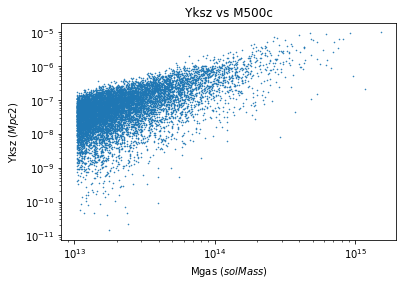

In [5]:
s.plot_Y_M()

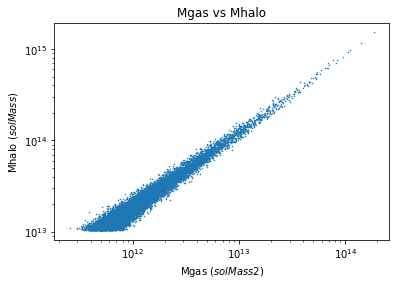

In [6]:
s.gas_halo_relation()

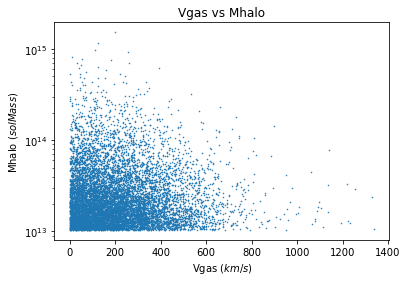

In [7]:
s.velo_halo_relation('z')

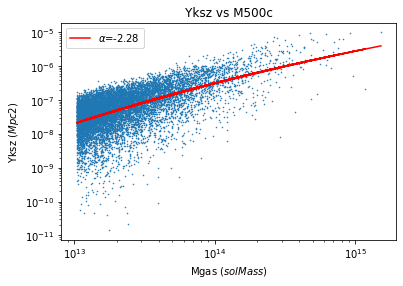

In [8]:
s.plot_Y_M_fit()

In [9]:
Y,M = s.Y_M()

In [55]:
inp = np.zeros((len(M),4))
inp[:,0] = np.log(s.Mgas.value)
inp[:,1] = np.log(s.Mstar.value)
inp[:,2] = s.Vlos.value
inp[:,3] = np.array(d.dataframe['number_density'])


[]

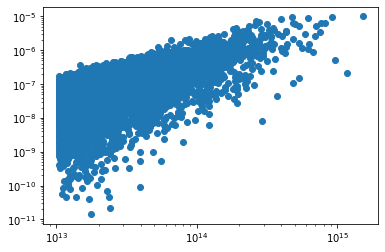

In [56]:
plt.scatter(M.value,Y.value)
plt.semilogy()
plt.semilogx()

In [57]:
regr = RandomForestRegressor(max_depth=50, random_state=0,min_samples_leaf=5,n_estimators=50,n_jobs=-1)

In [58]:
regr.fit(inp, np.log(Y.value))

RandomForestRegressor(max_depth=50, min_samples_leaf=5, n_estimators=50,
                      n_jobs=-1, random_state=0)

In [59]:
regr.feature_importances_

array([3.50698983e-01, 7.51891584e-03, 6.41755390e-01, 2.67119782e-05])

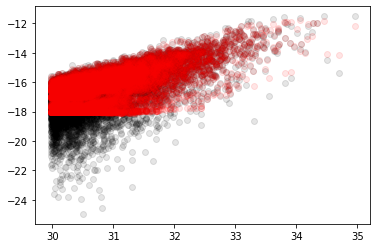

In [17]:
plt.plot(np.log(M.value),np.log(Y.value),'o',alpha=0.1,c='k')
plt.plot(np.log(M.value),np.log(regr.predict(inp)),'o',alpha=0.1,c='r')

In [71]:
inp_reg = np.zeros((len(M),3))
inp_reg[:,0] = s.Mgas.value
inp_reg[:,1] = s.Vlos.value
inp_reg[:,2] = np.array(d.dataframe['number_density'])


In [72]:
from pysr import PySRRegressor

In [73]:
model = PySRRegressor(
    niterations=40,
    binary_operators=["+", "-", "*", "/",'pow'],
    unary_operators=["neg","exp","log"],
    #denoise=True,
    procs=7,
    model_selection="best")

In [74]:
model.fit(inp_reg, np.log(Y.value),weights=np.power(s.Mhalo.value,1/2))

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1743: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


PySRRegressor.equations_ = [
	   pick      score                           equation          loss  \
	0         0.000000                         -16.304184  2.449907e+00   
	1         0.235023             (log(x1) + -21.379555)  1.210436e+00   
	2  >>>>  13.609728         (log(x0 * x1) + -49.63782)  1.826765e-12   
	3         0.227970  ((log(x0) + -49.63782) + log(x1))  1.454375e-12   
	
	   complexity  
	0           1  
	1           4  
	2           6  
	3           7  
]

In [75]:
model.sympy()

log(x0*x1) - 49.63782

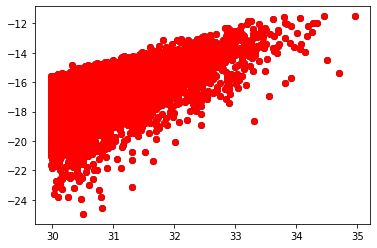

In [76]:
plt.scatter(np.log(M.value),np.log(Y.value),c='k')
plt.scatter(np.log(M.value),model.predict(inp_reg),c='r')